인구 구조가 알고 싶은 지역 이름(동 단위)을 입력해주십시오.  ex.병점2동   미아동


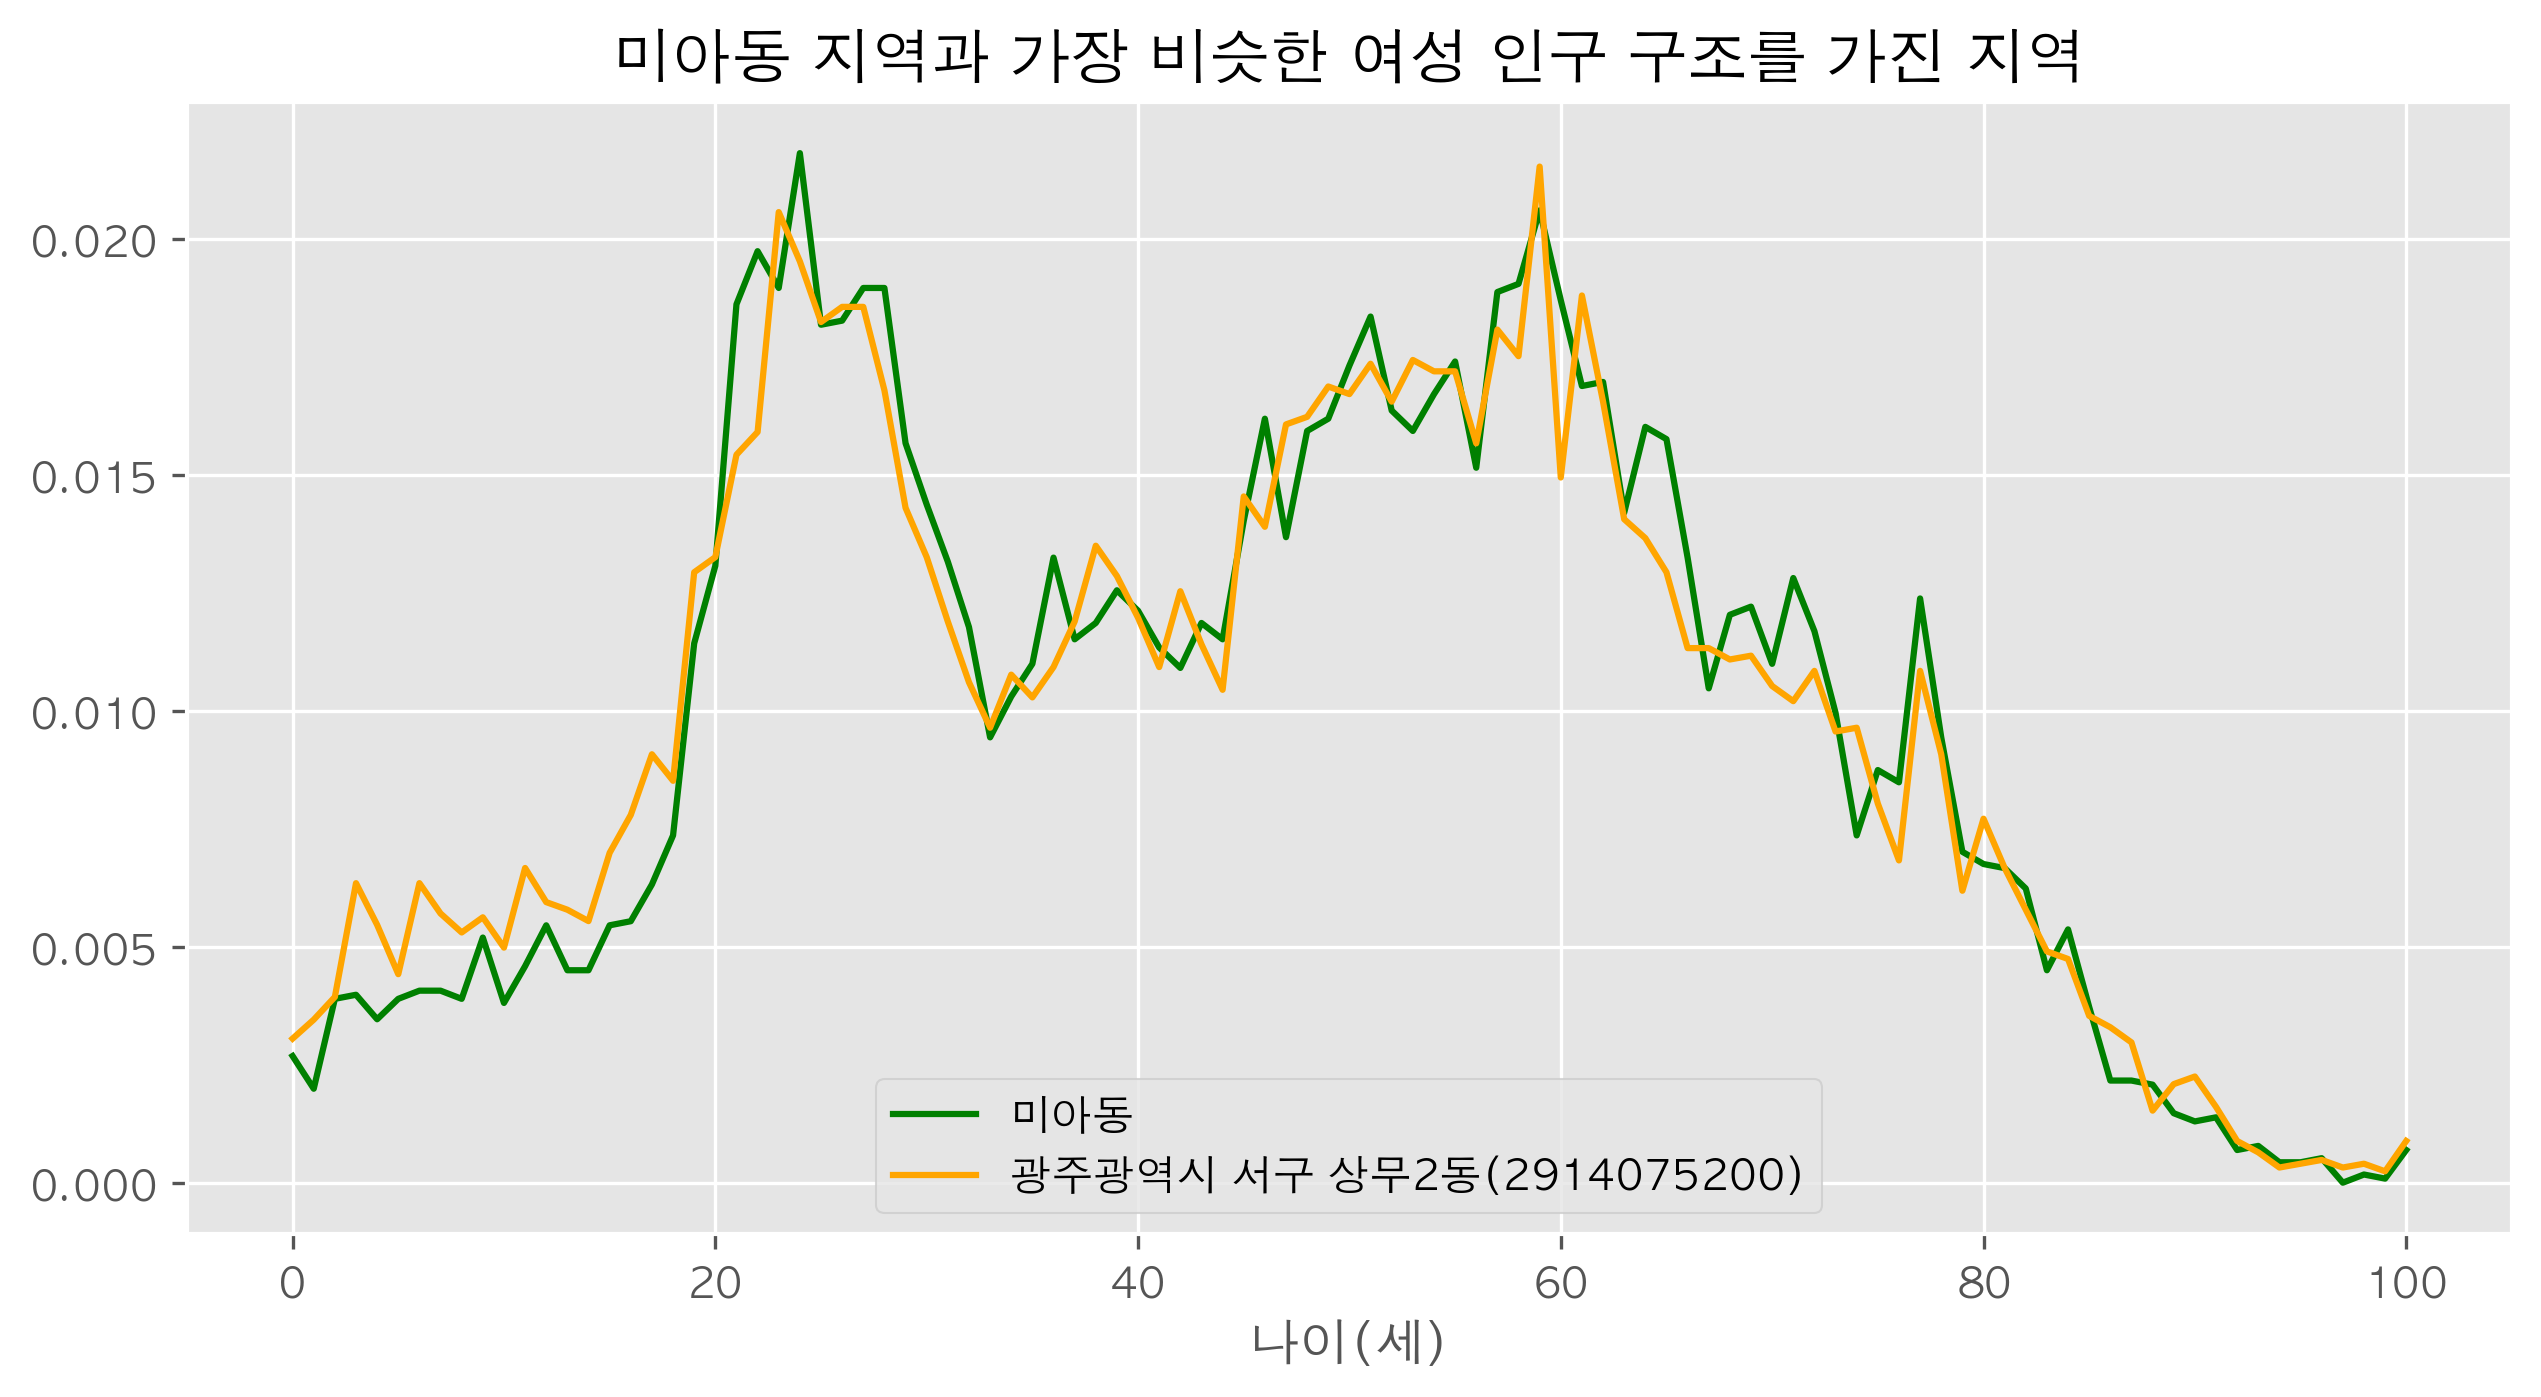

In [39]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 수강생 본인이 태어난 지역(동단위)을 입력 받아
file = open('202002.csv', 'r', encoding = 'cp949')   # csv 읽어오기
data = csv.reader(file)
next(data)
data = list(data)
region = input('인구 구조가 알고 싶은 지역 이름(동 단위)을 입력해주십시오.  ex.병점2동   ')
mn = 1
result_name = ''
result = 0

# 2. 입력한 지역의 인구 구조를 저장한다.
for row in data:
    if region in row[0]:
        home = np.array(row[106:], dtype=int)/int(row[105])

# 3. 여성 인구 구조가 가장 비슷한 지역을 찾는다.
for row in data:
    away = np.array(row[106:], dtype=int)/int(row[105])
    s = np.sum((home-away)**2)
    if s < mn and region not in row[0]:
        mn = s
        result_name = row[0]
        result = away

# 4. 입력한 지역의 여성 인구 구조와 가장 비슷한 지역의 여성 인구 현황을 꺽은선 그래프로 시각화한다.
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font', family='AppleGothic')
plt.title(region +' 지역과 가장 비슷한 여성 인구 구조를 가진 지역')
plt.plot(home, label=region, color='green')
plt.plot(result, label=result_name, color='orange')
plt.xlabel('나이(세)')
plt.legend()
plt.savefig('2017110059.png', dpi=300)
plt.show()
    